# Mounting google drive

In order to make it easy to read data from Google Drive, it can be mounted as a "local" unity. This encapsulates the connection to Google API and reduce the amount of coding that would be needed when interacting with Google API

In [3]:
# First check if running on Google Colab

from google.colab import drive

# Install required packages
! pip install pandarallel
! pip install opencv-python

# Mount Drive
drive.mount("/content/gdrive", force_remount=True)

file_placement = "/content/gdrive/MyDrive/09 CS659 Image Processing and Analysis/data"

Mounted at /content/gdrive


In [10]:
import os
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import pandas as pd


base_folder = os.path.join(file_placement, "..")
train_and_test = pd.read_excel(os.path.join(base_folder, "train_and_test_set.xlsx"))
train_and_test["new_file_name"] = train_and_test.index + 1
train_and_test["new_file_name"] = train_and_test["new_file_name"].astype(str)
train_and_test["new_file_name"] = "img" + train_and_test["new_file_name"].str.rjust(5, "0") + ".png"

In the next code blocks we experimented (or simulated) how PyTorch would do for augmentation. We didn't use PyTorch for this exploration because it augments in real time, when iterating over a batch, not keeping tabs on the transformations applied.

In [11]:
import numpy as np
import cv2

def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

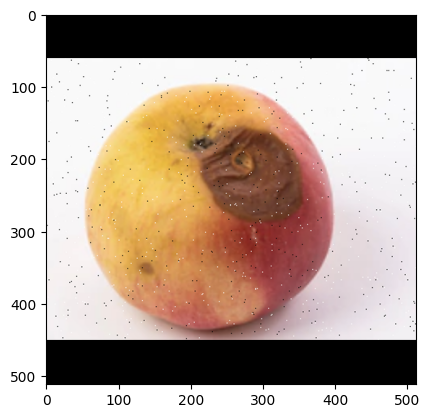

-90


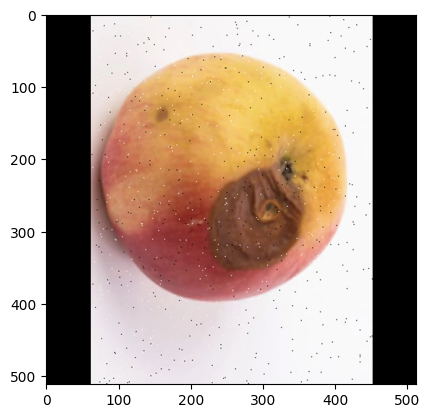

-60


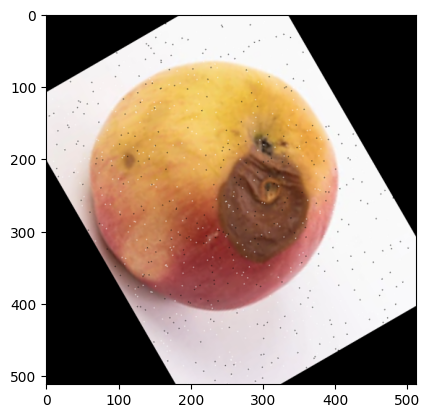

-45


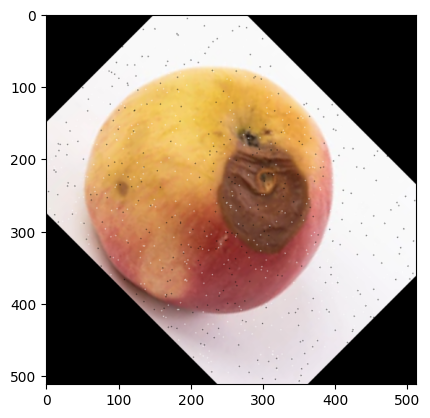

45


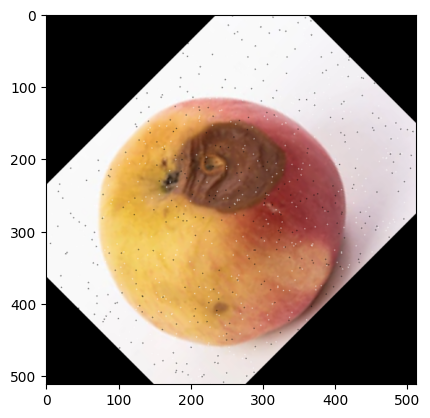

60


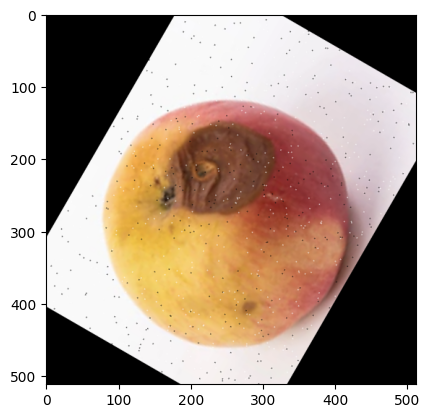

90


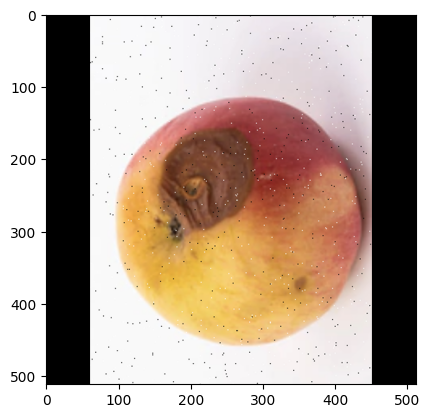

flippling vertically


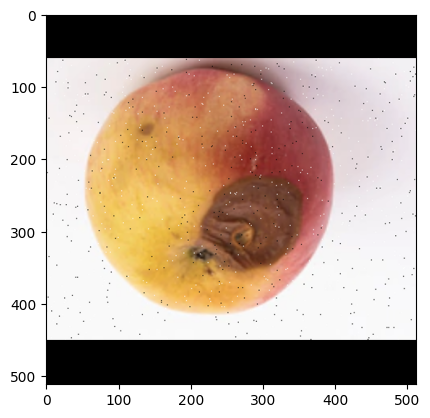

flippling horizontally


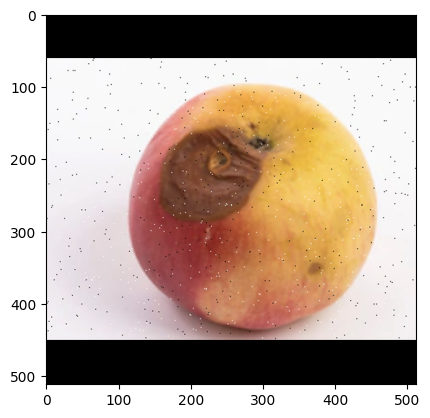

In [25]:
sample_max_width = (train_and_test[train_and_test["fresh"] == False]).sample(n=1)

image_path = sample_max_width.iloc[0]["path"]
not_fresh_path = os.path.join(base_folder, "transformed_images", "notfresh")
fresh_path = os.path.join(base_folder, "transformed_images", "fresh")

is_fresh = sample_max_width["fresh"].values
if is_fresh == True:
    new_placement = os.path.join(fresh_path, os.path.basename(image_path))
else:
    new_placement = os.path.join(not_fresh_path, os.path.basename(image_path))

new_placement = new_placement.replace(sample_max_width.iloc[0]["file_name"], sample_max_width.iloc[0]["new_file_name"])
image = cv2.imread(new_placement)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()
for each_degree in [-90, -60, -45, 45, 60, 90]:
    image_rotated = rotate_image(image,each_degree)
    print(each_degree)
    plt.imshow(image_rotated)
    plt.show()

image_flipped = cv2.flip(image, 0)
print("flippling vertically")
plt.imshow(image_flipped)
plt.show()

image_flipped = cv2.flip(image, 1)
print("flippling horizontally")
plt.imshow(image_flipped)
plt.show()

Now we finally tested how the augmentation would work on PyTorch

In [26]:
data_folder = os.path.join(base_folder, "transformed_images")
transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(data_folder, transform=transform)

In [27]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


In [28]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False, drop_last=True)
images, labels = next(iter(dataloader))


In [29]:
transform =  transforms.Compose([
    transforms.RandomRotation(90),
    transforms.RandomHorizontalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()]
)
dataset_augmented = datasets.ImageFolder(data_folder, transform=transform)
dataloader_augmented = torch.utils.data.DataLoader(dataset_augmented, batch_size=64, shuffle=False, drop_last=True)
images_augmented, labels_augmented = next(iter(dataloader_augmented))

In [30]:
images, labels = next(iter(dataloader))
images_augmented, labels_augmented = next(iter(dataloader_augmented))
for i in range(10):
    # if labels[i] == 1:
    imshow(images[i], normalize=False)
    imshow(images_augmented[i], normalize=False)

Output hidden; open in https://colab.research.google.com to view.